BRAIN TUMOR CLASSIFICATION

    https://www.kaggle.com/jakeshbohaju/brain-tumor
    https://www.smir.ch/BRATS/Start2015
    
ATTRIBUTES:

    First Order Features

        - Mean
        - Variance
        - Standard Deviation
        - Skewness
        - Kurtosis

    Second Order Features (texture)

        - Contrast
        - Energy
        - ASM (Angular second moment)
        - Entropy
        - Homogeneity
        - Dissimilarity
        - Correlation
        - Coarseness
        
    Image: defines image name
    Class: whether image has tumor or not (1 = Tumor, 0 = Non-Tumor)

In [21]:
# n = 3762

import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os

np.random.seed(1)

In [17]:
bt = pd.read_csv("Brain Tumor.csv")

In [18]:
bt.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [19]:
bt['Class'].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

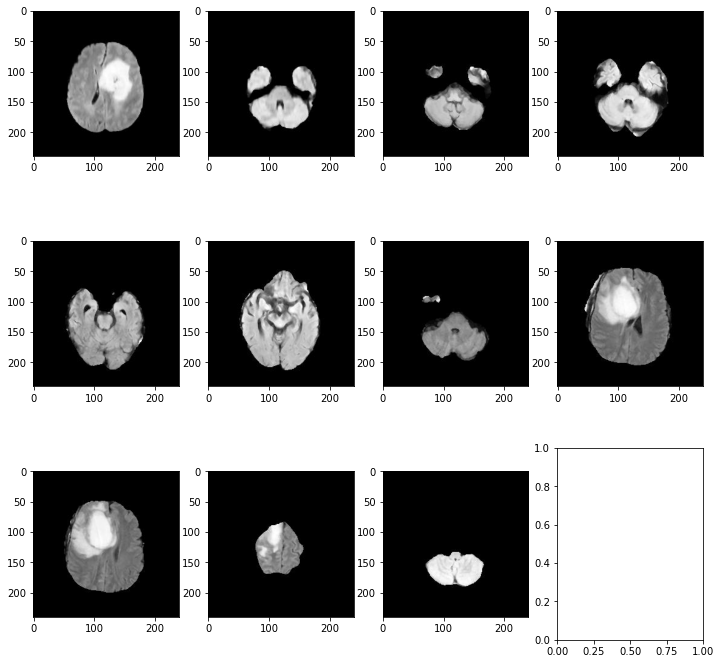

In [70]:
path = "Brain Tumor/Brain Tumor"
idx = 1
fig, axs = plt.subplots(1, 1, figsize=(12, 12))
for i in os.listdir(path)[:12]:
    img = plt.imread(path + "/" + i)
    plt.imshow(img, aspect='equal')
    plt.subplot(3,4,idx)
    idx+=1

In [ ]:
#TODO: 
#describe each feature